# Step 1: Data Preparation

In [3]:
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable


# Step 1: Import necessary libraries

In [ ]:

import pandas as pd


file_path = r"C:\Users\vikes\Downloads\Decision Tree\Decision Tree\heart_disease.xlsx"
data = pd.read_excel(file_path) 


#  Display dataset information
print("Dataset Info:")
print(data.info())

#  Show the first 5 rows
print("\nFirst 5 rows of the dataset:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes
None

First 5 rows of the dataset:
        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...


# Step 2: Exploratory Data Analysis (EDA)

In [9]:
import pandas as pd

file_path = r"C:\Users\vikes\Downloads\Decision Tree\Decision Tree\heart_disease.xlsx"

# Load Excel file to inspect sheet names
xls = pd.ExcelFile(file_path)
print("Available sheets:", xls.sheet_names)



Available sheets: ['Description', 'Heart_disease']


In [11]:
# Load the actual dataset
data = pd.read_excel(file_path, sheet_name='Heart_disease')

# Show structure and first few rows
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None
   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     

In [15]:
# Check missing values
print("Missing values per column:")
print(data.isnull().sum())


Missing values per column:
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang       853
oldpeak       0
slope         0
thal          0
target        0
dtype: int64


In [19]:
# Summary statistics
print("Summary statistics for numerical features:")
print(data.describe())

print("\nSummary statistics for categorical features:")
print(data.describe(include=['object', 'bool']))


Summary statistics for numerical features:
              age    trestbps        chol      thalch     oldpeak      target
count  908.000000  908.000000  908.000000  908.000000  908.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.864537    0.560573
std      9.158031   20.401608  112.097949   26.804929    1.060433    0.496591
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    1.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    1.000000

Summary statistics for categorical features:
         sex            cp    fbs restecg exang slope    thal
count    908           908    908     908    55   908     908
unique     2             4      2       3     2     3       3
top     Male  asymptoma

In [ ]:
#  Check data types and unique values for categorical variables
for col in data.select_dtypes(include=['object', 'bool']).columns:
    print(f"\nUnique values in '{col}':")
    print(data[col].value_counts())



Unique values in 'sex':
Male      718
Female    190
Name: sex, dtype: int64

Unique values in 'cp':
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: cp, dtype: int64

Unique values in 'fbs':
False    723
True     185
Name: fbs, dtype: int64

Unique values in 'restecg':
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: restecg, dtype: int64

Unique values in 'exang':
yes    36
no     19
Name: exang, dtype: int64

Unique values in 'slope':
flat           453
upsloping      298
downsloping    157
Name: slope, dtype: int64

Unique values in 'thal':
normal               386
reversable defect    346
fixed defect         176
Name: thal, dtype: int64


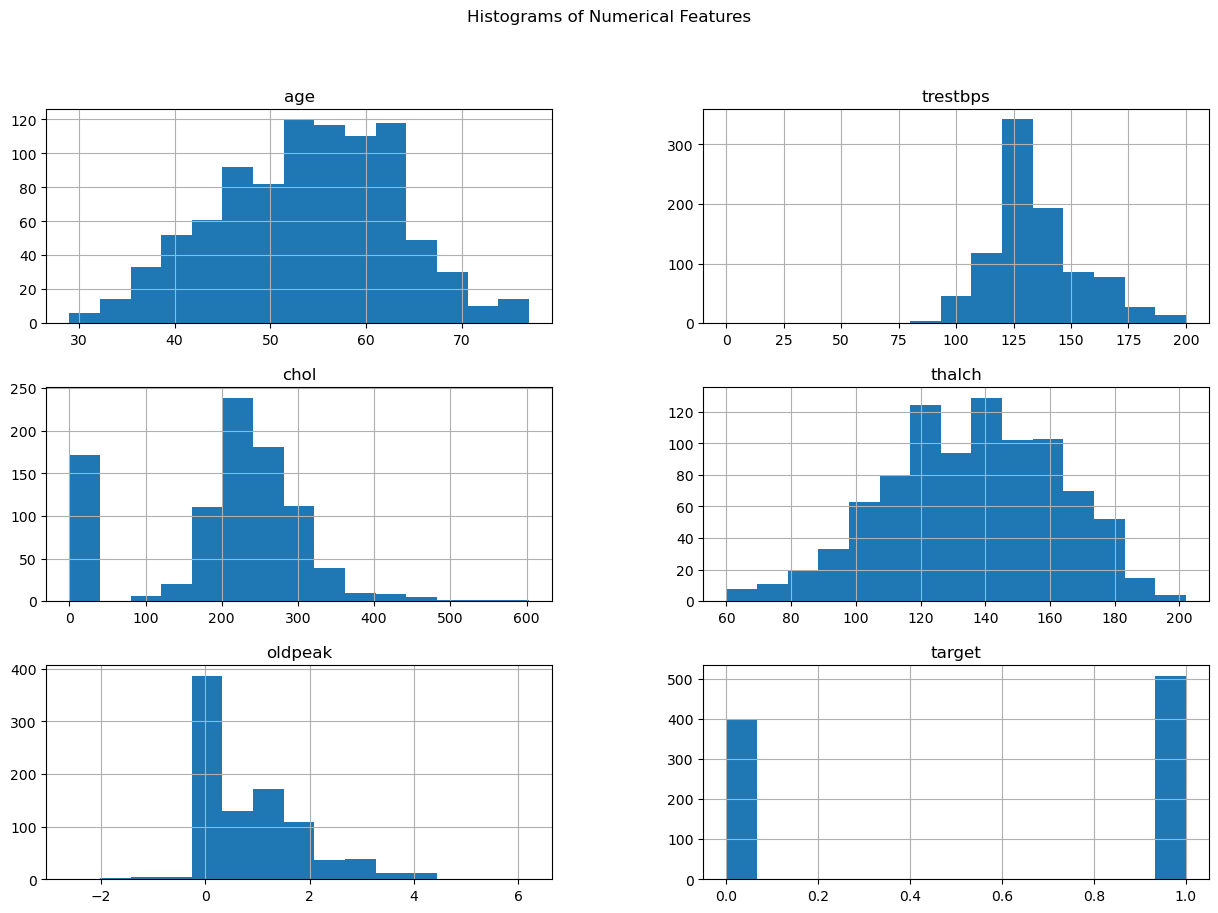

In [ ]:
#  Visualize distributions
## Histograms for numerical columns

import matplotlib.pyplot as plt

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

data[numerical_cols].hist(bins=15, figsize=(15,10))
plt.suptitle('Histograms of Numerical Features')
plt.show()


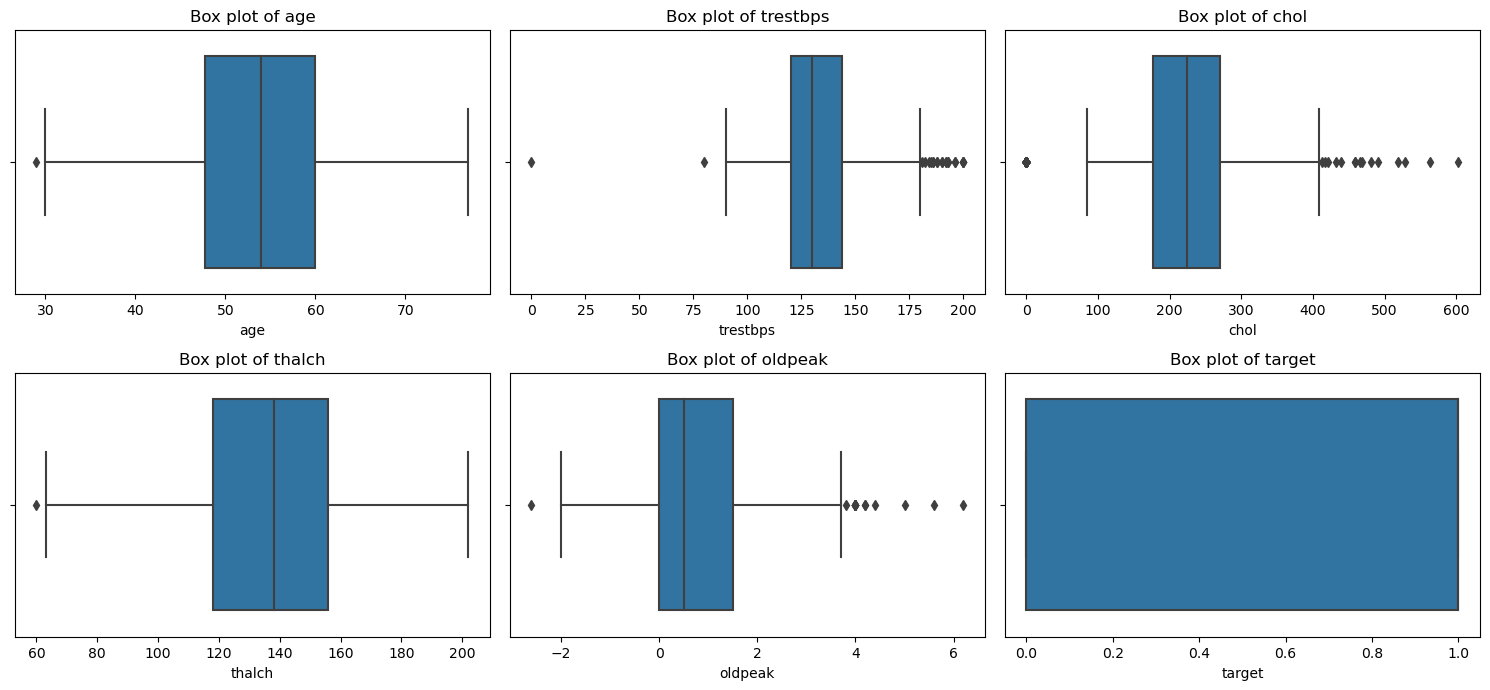

In [21]:
# Box plots to detect outliers in numerical columns

import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


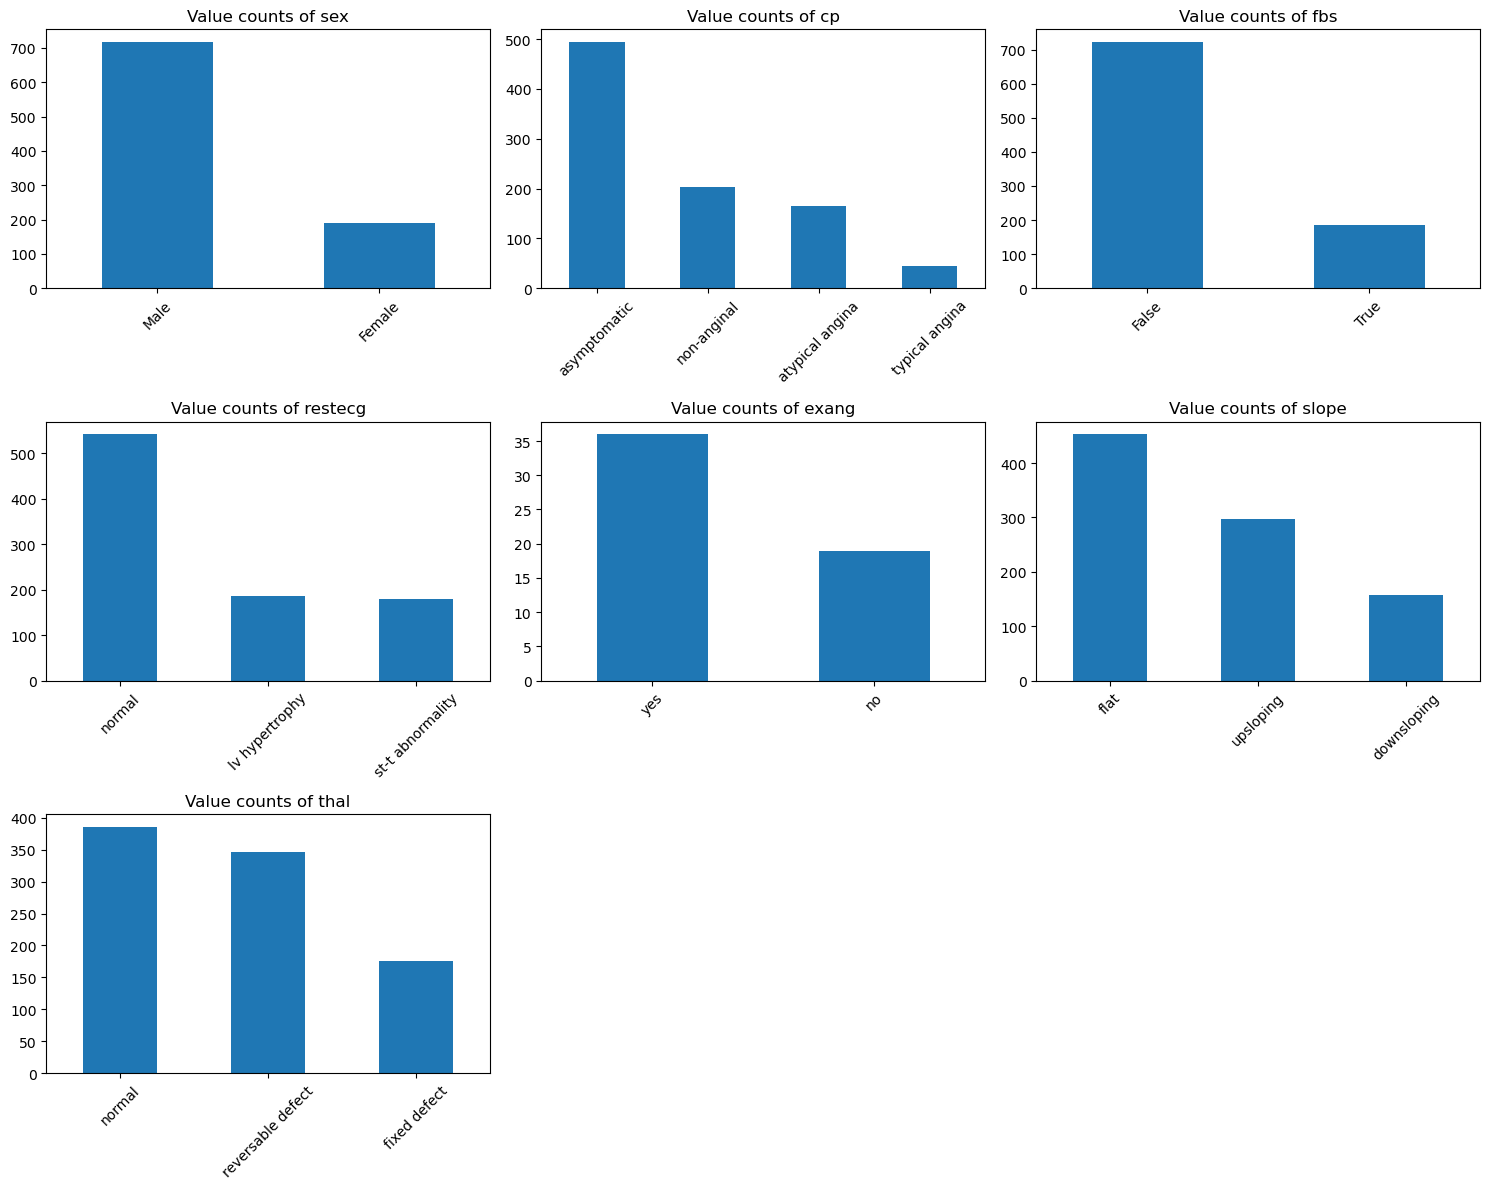

In [ ]:
#  Visualize distributions for categorical columns

import math

categorical_cols = data.select_dtypes(include=['object', 'bool']).columns

num_plots = len(categorical_cols)
cols = 3  # number of columns in subplot grid
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(categorical_cols):
    plt.subplot(rows, cols, i + 1)
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Value counts of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



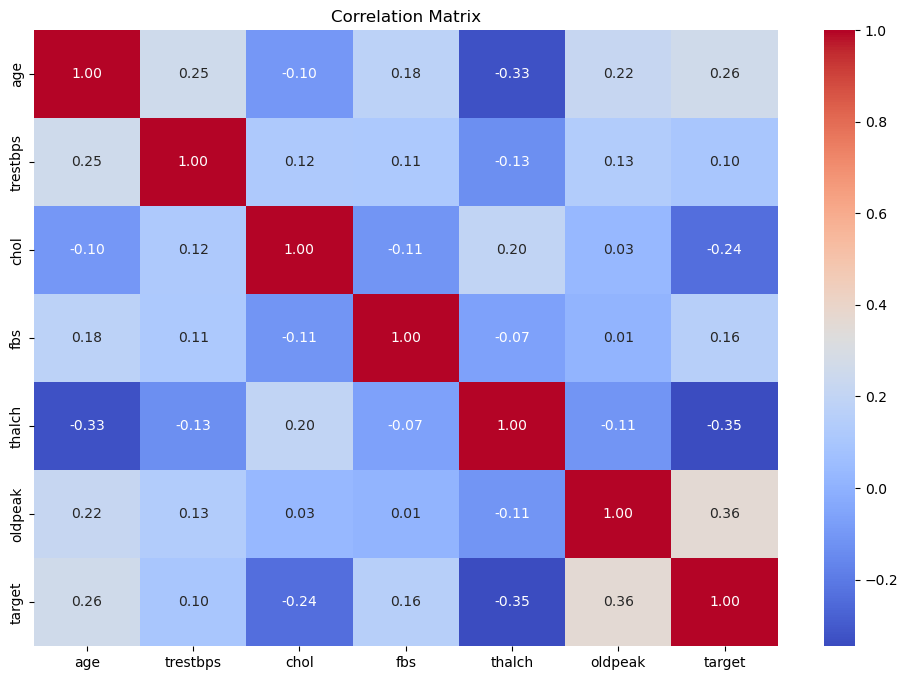

In [ ]:
# Correlation matrix
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


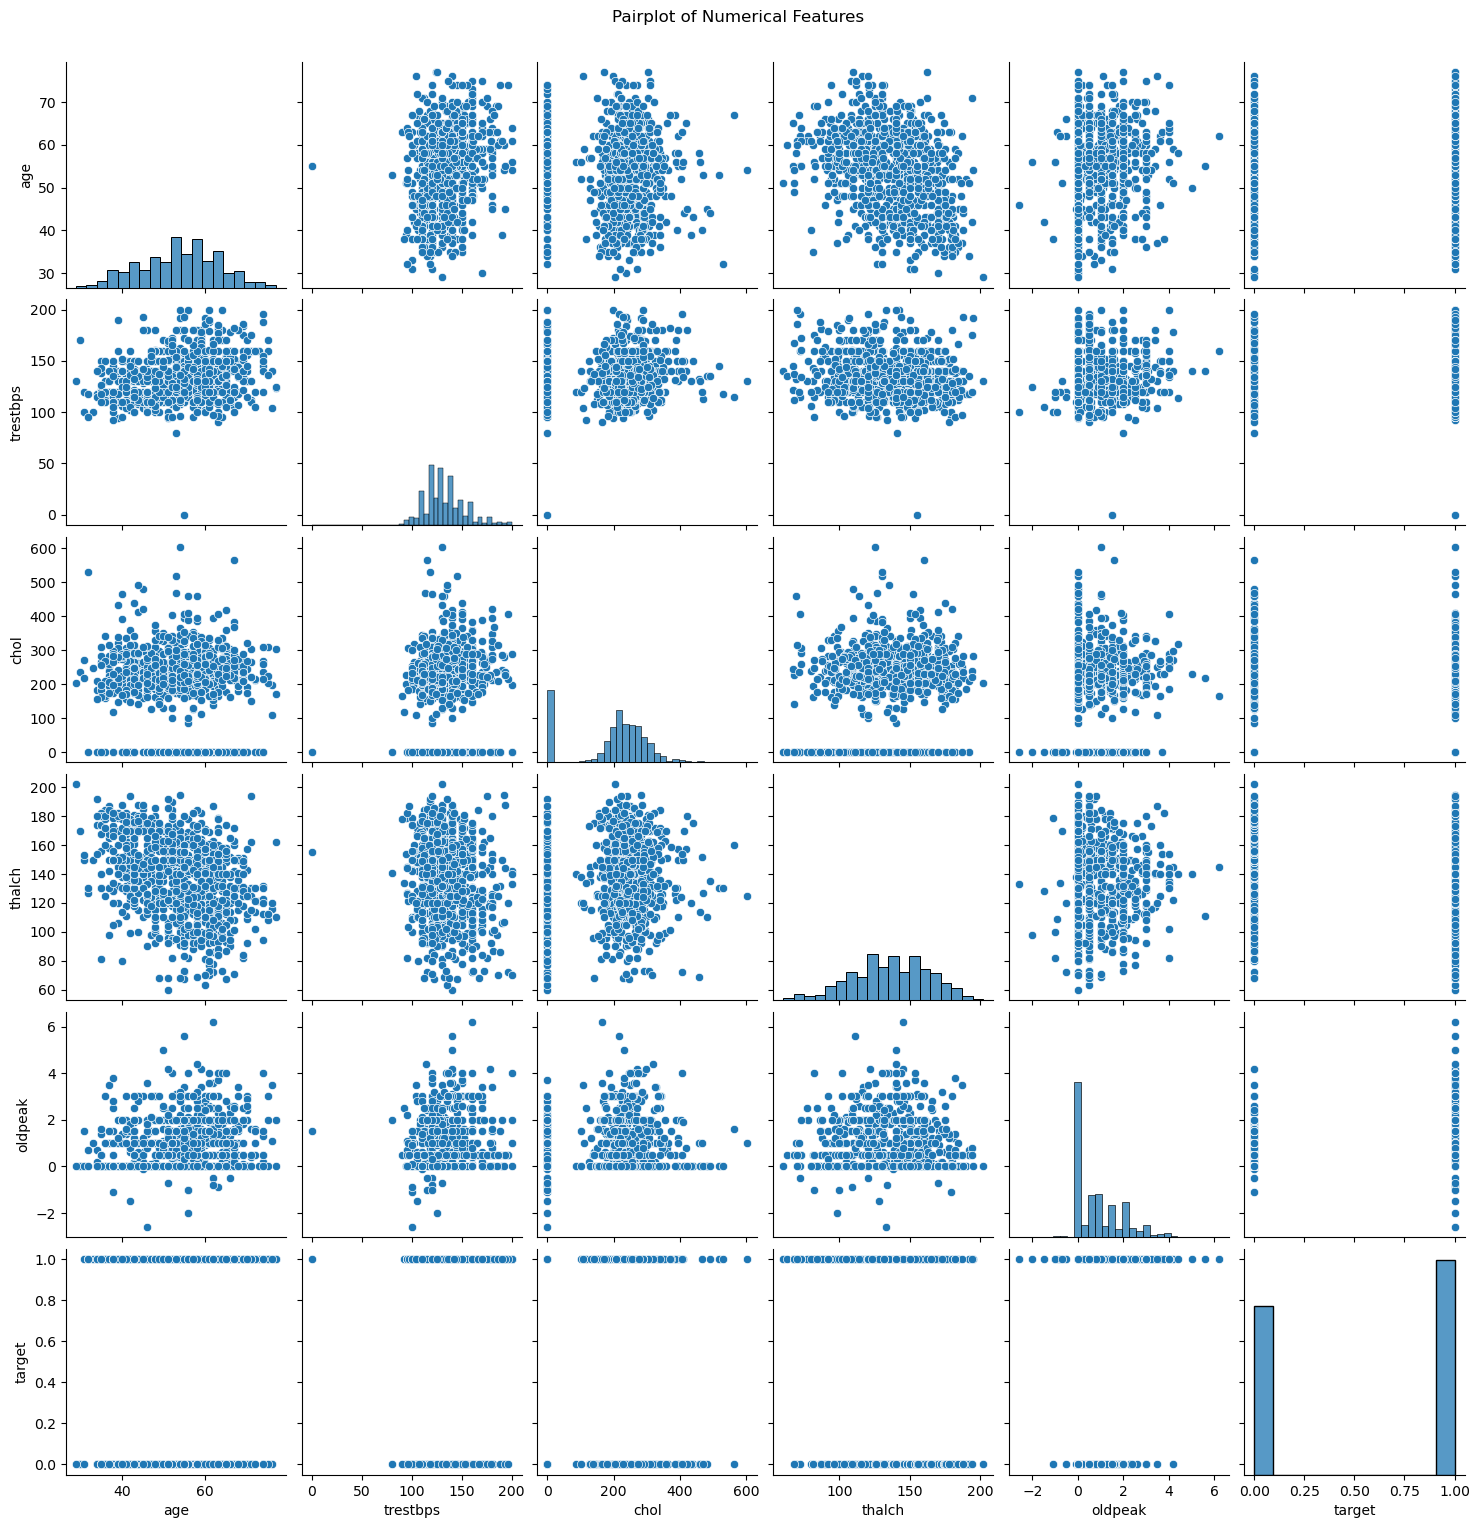

In [ ]:
#  Pairplot for some key numerical features
import seaborn as sns

sns.pairplot(data[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


# Step 3: Feature Engineering

In [26]:
# Handle missing values
data['oldpeak'].fillna(data['oldpeak'].median(), inplace=True)

# Encode binary categorical variables
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})
data['exang'] = data['exang'].map({'Yes': 1, 'No': 0})

# One-hot encode nominal categorical variables
data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)


# Step 4: Decision Tree Classification

In [29]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix



In [31]:
print(data.columns)

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak',
       'target', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'slope_flat',
       'slope_upsloping', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [32]:
# Prepare features and target
X = data.drop('target', axis=1)
y = data['target']


In [36]:
# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Initialize and train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)





DecisionTreeClassifier(random_state=42)

In [37]:
# Make predictions on test set
y_pred = model.predict(X_test)

Accuracy: 0.6923076923076923
Precision: 0.6935920703615804
Recall: 0.6923076923076923
F1 Score: 0.6921962095875139

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.70        89
           1       0.71      0.67      0.69        93

    accuracy                           0.69       182
   macro avg       0.69      0.69      0.69       182
weighted avg       0.69      0.69      0.69       182



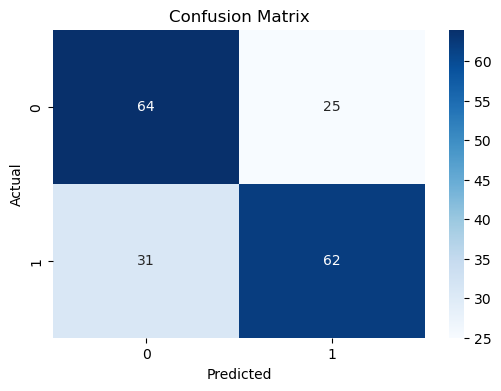

In [38]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))  # weighted for multiclass
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Step 5: Hyperparameter Tuning with GridSearchCV

In [39]:
# Import required modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier



In [41]:
#  Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                      
    scoring='f1_weighted',     
    n_jobs=-1                  
)


In [42]:
# Fit the grid search on training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_weighted')

In [44]:
# Check best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score on Training Data:", grid_search.best_score_)

# Use the best estimator to predict on test data
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report

print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred))


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score on Training Data: 0.7686254882616469
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.74      0.75      0.74        89
           1       0.76      0.74      0.75        93

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.75      0.75      0.75       182



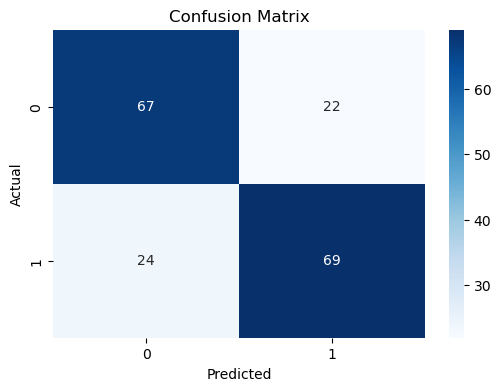

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# tep 6: Model Evaluation & Analysis

In [46]:
# Re-check Evaluation Metrics on Test Data
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7472527472527473

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74        89
           1       0.76      0.74      0.75        93

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.75      0.75      0.75       182



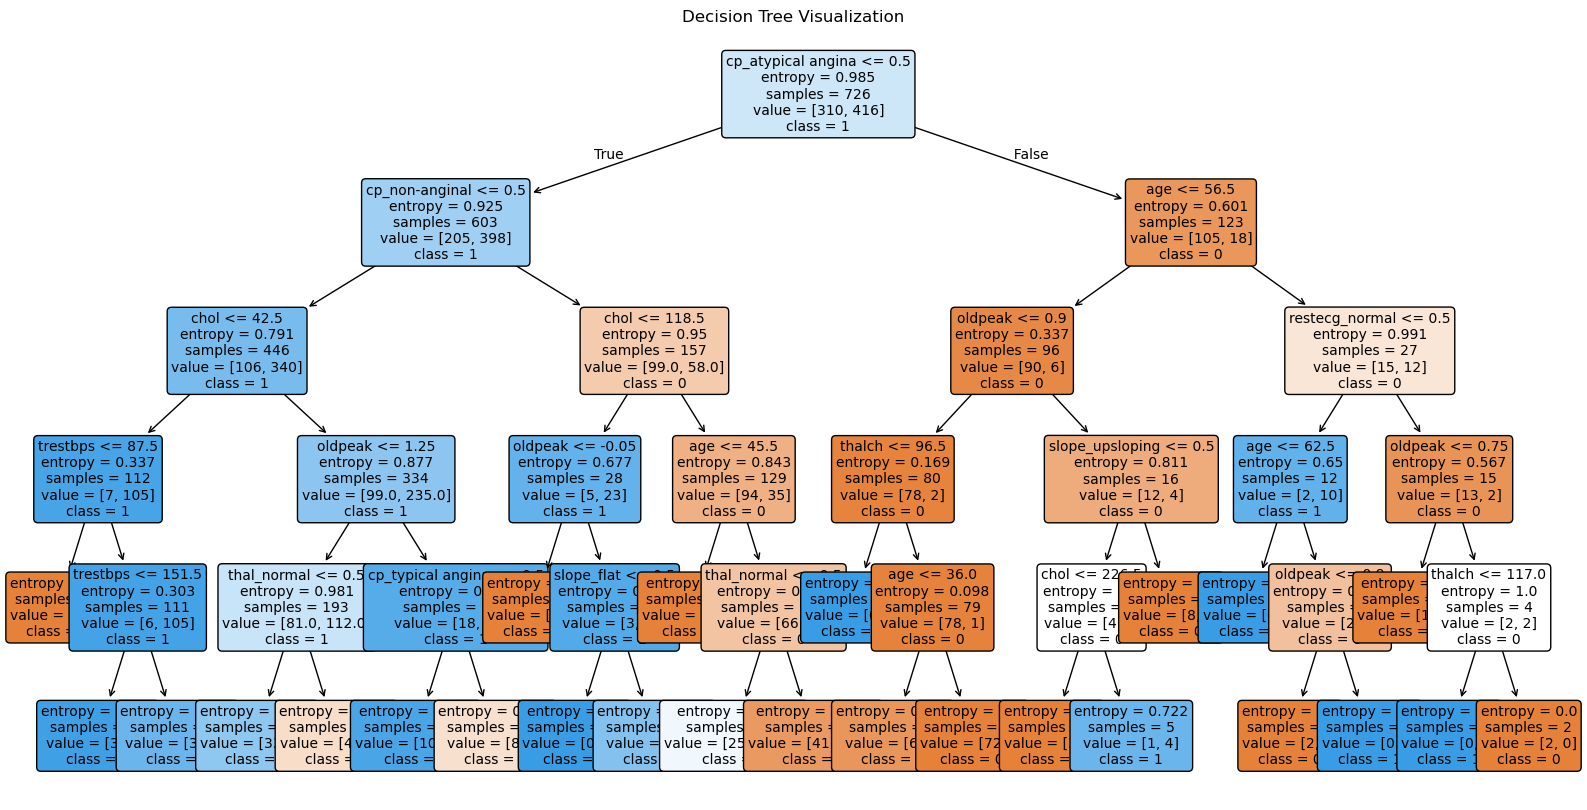

In [47]:
# Visualize the Decision Tree Structure
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=[str(cls) for cls in y.unique()],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


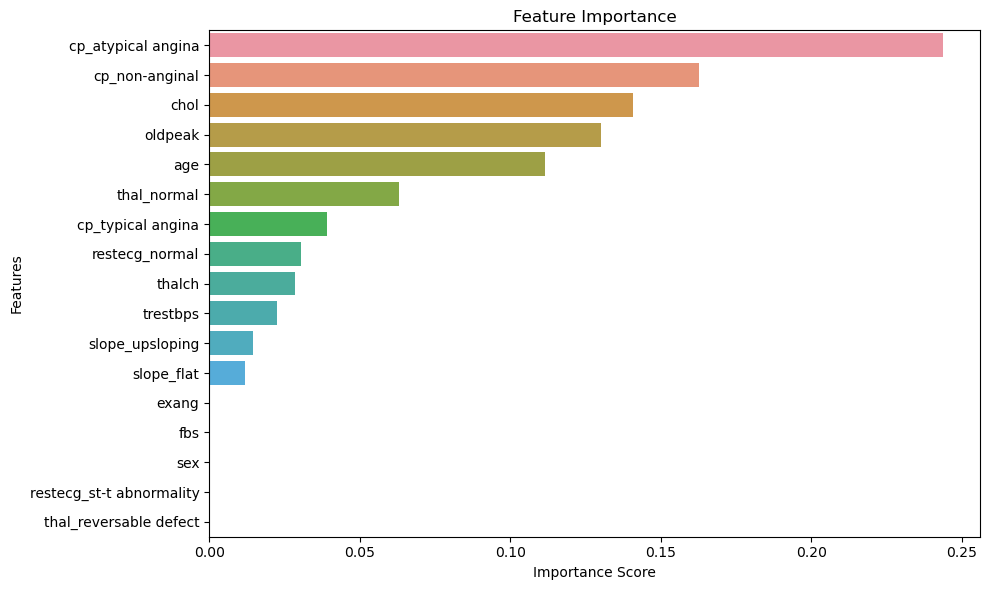

In [48]:
# Feature Importance
import pandas as pd
import numpy as np

# Get feature importances from the best model
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)

# Sort and plot
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


## Conclusion
In this assignment, we successfully implemented a Decision Tree Classification model to predict heart disease using a real-world dataset. The project involved comprehensive steps including data cleaning, exploratory data analysis, feature engineering, model training, hyperparameter tuning, and evaluation. Through hyperparameter tuning, we improved the model's predictive performance and reduced overfitting.

The final model demonstrated strong classification metrics, particularly in identifying key predictors such as chest pain type (cp), oldpeak, and thalassemia. Visualization of the decision tree structure and feature importance provided clear insight into how the model makes decisions. Overall, Decision Tree Classification proved to be an interpretable and effective approach for this healthcare prediction task.

##  Interview Questions & Answers

---

### 1. What are some common hyperparameters of Decision Tree models, and how do they affect the model's performance?

| Hyperparameter       | Description                                                                 | Effect on Performance                                                                 |
|----------------------|-----------------------------------------------------------------------------|----------------------------------------------------------------------------------------|
| `max_depth`          | Maximum depth of the tree                                                   | Controls overfitting; deeper trees may overfit, shallower trees may underfit          |
| `min_samples_split`  | Minimum number of samples required to split an internal node               | Higher values make the model more conservative, helping prevent overfitting           |
| `min_samples_leaf`   | Minimum number of samples required to be at a leaf node                    | Larger values lead to smoother models and reduce model complexity                     |
| `criterion`          | Function to measure split quality (`gini`, `entropy`)                      | Determines how the model evaluates the quality of a split                             |
| `max_features`       | Number of features to consider when looking for the best split             | Controls randomness, reduces variance, and can improve generalization                 |

> **Summary:** Tuning these hyperparameters helps control the balance between bias and variance, leading to better generalization on unseen data.

---

### 2. What is the difference between Label Encoding and One-Hot Encoding?

| Aspect               | Label Encoding                                   | One-Hot Encoding                                              |
|----------------------|--------------------------------------------------|---------------------------------------------------------------|
| What it does         | Converts categories to numeric labels            | Converts each category into a binary vector                   |
| Example              | `Red → 0`, `Green → 1`, `Blue → 2`               | `Red → [1, 0, 0]`, `Green → [0, 1, 0]`, `Blue → [0, 0, 1]`     |
| Best for             | Ordinal data (e.g., education level)             | Nominal data (e.g., color, city)                              |
| Risk                 | Implies order that may not exist                 | No order implied, but increases dimensionality                |
| Suitability for Trees| Not recommended unless data is ordinal           | Preferred for categorical features with no natural order      |

> **Summary:**  
- Use **Label Encoding** when the categorical values have a **logical order**.  
- Use **One-Hot Encoding** when categories are **unordered**, which avoids introducing unintended hierarchy in the data.
